In [27]:
from herbie import Herbie, fast_Herbie_xarray
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [10]:
DATES = pd.date_range('2022-05-25', periods=6, freq='1H')
DATES

DatetimeIndex(['2022-05-25 00:00:00', '2022-05-25 01:00:00',
               '2022-05-25 02:00:00', '2022-05-25 03:00:00',
               '2022-05-25 04:00:00', '2022-05-25 05:00:00'],
              dtype='datetime64[ns]', freq='H')

In [11]:
ds = fast_Herbie_xarray(DATES=DATES, searchString='(?:U|V)GRD:500 mb', model='hrrr', product='prs', fxx=0)

C:\Users\blayl_depgywe\BB_python\Herbie\herbie\archive.py:980: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")
C:\Users\blayl_depgywe\BB_python\Herbie\herbie\archive.py:980: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")
C:\Users\blayl_depgywe\BB_python\Herbie\herbie\archive.py:980: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")
C:\Users\blayl_depgywe\BB_python\Herbie\herbie\archive.py:980: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")
C:\Users\blayl_depgywe\BB_python\Herbie\herbie\archive.py:980: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


In [12]:
ds

<xarray.Dataset>
Dimensions:              (time: 6, y: 1059, x: 1799)
Coordinates:
  * time                 (time) datetime64[ns] 2022-05-25 ... 2022-05-25T05:0...
    step                 timedelta64[ns] 00:00:00
    isobaricInhPa        float64 500.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           (time) datetime64[ns] 2022-05-25 ... 2022-05-25T05:0...
Dimensions without coordinates: y, x
Data variables:
    u                    (time, y, x) float32 -5.687 -5.687 ... 15.73 15.86
    v                    (time, y, x) float32 2.45 2.45 2.45 ... 2.501 2.564
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 prs
    description:             High-Resolution Rapid Refresh - CONUS
    searchString:            (?:U|V)GRD:500 mb

In [33]:
minneapolis = (-93.25, 44.98) # (lon, lat)
ds_at_point = ds.herbie.nearest_points(points=minneapolis)
ds_at_point = ds_at_point.squeeze() # I did squeeze because we only requested one point
ds_at_point

<xarray.Dataset>
Dimensions:              (time: 6)
Coordinates:
  * time                 (time) datetime64[ns] 2022-05-25 ... 2022-05-25T05:0...
    step                 timedelta64[ns] 00:00:00
    isobaricInhPa        float64 500.0
    latitude             float64 44.97
    longitude            float64 266.7
    valid_time           (time) datetime64[ns] 2022-05-25 ... 2022-05-25T05:0...
    metpy_crs            object Projection: lambert_conformal_conic
    y                    float64 7.287e+05
    x                    float64 3.355e+05
Data variables:
    u                    (time) float32 10.5 7.967 6.268 6.485 5.529 4.483
    v                    (time) float32 9.762 10.36 10.19 13.88 14.46 14.81
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 prs
    description:             High-Resolution Rapid Refresh - CONUS
    searchString:            (?:U|V)GRD:500 mb

In [37]:
from toolbox.cartopy_tools import common_features

(-98.90457691708517, -87.6198491405955, 41.98321470341232, 47.95574164594418)

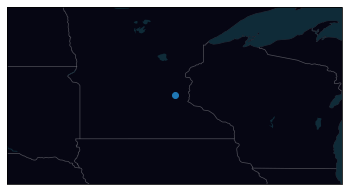

In [52]:
ax = common_features('10m', dark=True).STATES(edgecolor='w').LAKES().ax
ax.scatter(ds_at_point.longitude.item(), ds_at_point.latitude.item())
ax.adjust_extent()

In [54]:
ds_at_point.longitude.item()-360, ds_at_point.latitude.item()

(-93.26221302884034, 44.96947817467825)

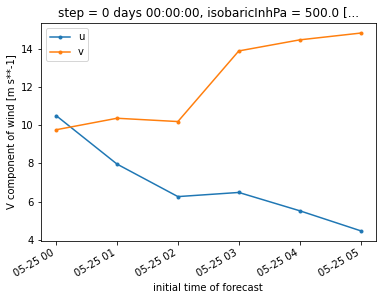

In [34]:
ds_at_point.u.plot(label='u', marker='.')
ds_at_point.v.plot(label='v', marker='.')
plt.legend()